<a href="https://colab.research.google.com/github/THARUN2004-star/TICTACTOE/blob/main/Disaster_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import nltk
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re

In [4]:
train = pd.read_csv(r"/content/archive.zip")
test = pd.read_csv(r"/content/archive.zip")

In [5]:
train.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


<Axes: >

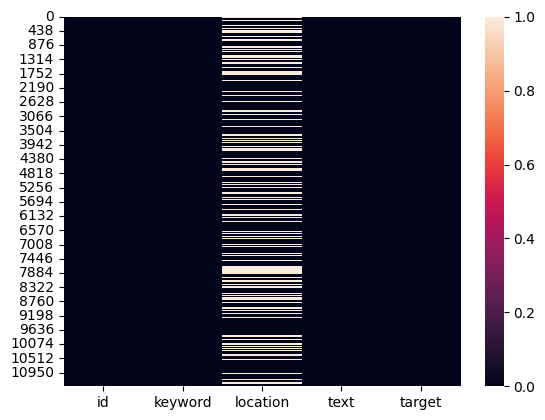

In [6]:
sns.heatmap(train.isnull())

In [8]:
train.isna().sum()

,0
id,0
keyword,0
location,3418
text,0
target,0


<Axes: xlabel='target', ylabel='count'>

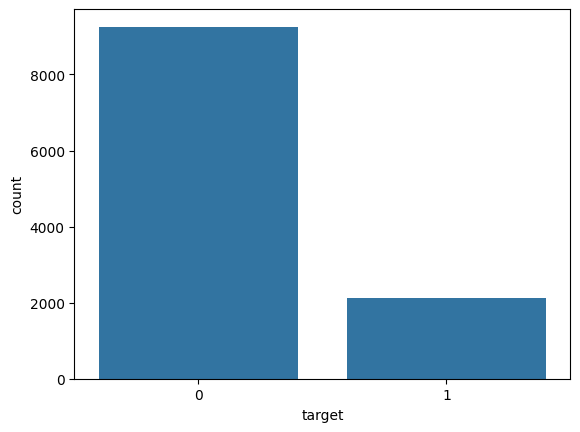

In [9]:
sns.countplot(data=train,x='target')

In [10]:
tfidf = TfidfVectorizer(max_features=5000,stop_words='english')
X = train['text']
y = train['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

In [11]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [12]:
y_pred_mnb = mnb.predict(X_test)
y_pred_mnb
accuracy_score(y_test,y_pred_mnb)

0.8839050131926122

In [13]:
bnb = BernoulliNB(alpha = 0.65)
bnb.fit(X_train,y_train)

BernoulliNB(alpha=0.65)

In [14]:
y_pred_bnb = bnb.predict(X_test)
accuracy_score(y_test,y_pred_bnb)

0.8966578715919086

In [15]:
rf = RandomForestClassifier(n_estimators=71)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=71)

In [16]:
y_pred_rf = rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.8891820580474934

In [17]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [18]:
pred_y_lr = lr.predict(X_test)
accuracy_score(y_test,pred_y_lr)

0.8856640281442393